In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import seaborn as sns

from foolbox.econometrics.misc import descriptives
from foolbox.backtesting.api import rank_sort
from textables.tables import TexTable
from ip_visuals import set_style_paper

from src.datafeed_.kraken.downstream import get_funding_rate

In [2]:
# carry is the negative of the relative funding rate, ~(spot / fwd - 1)
data_f = get_funding_rate()

carry = data_f \
    .query("rate == 'relative'").drop("rate", axis=1) \
    .set_index("timestamp") \
    .mul(-1)

In [3]:
# print descriptives (some are meaningless)
# there are 6 4-hour periods per day
ann = 365 * 6
carry_d = descriptives(carry, ann=ann, scl=100, cov_lags=30)
print(carry_d)

asset           xbt          bch          ltc          eth          xrp
mean      -2.416275    -4.358917    -1.553522    -4.732787    -6.930109
sterr      0.731245     1.320791     1.200882     0.891056     0.967573
tstat     -3.304330    -3.300233    -1.293651    -5.311439    -7.162361
median    -1.542867    -5.752180    -2.076256    -4.541236    -5.337544
std        0.311591     0.625363     0.509556     0.410873     0.497303
dstd       0.237598     0.385289     0.323799     0.289206     0.387650
q95       18.709770    41.870876    39.033422    25.222442    24.716475
q05      -26.946227   -42.012506   -35.724730   -33.641758   -45.705933
skew      -0.021777     1.137821     0.939809     0.528775    -0.045320
kurt       6.909457     7.111516     6.355470     7.371987     6.103074
sharpe    -7.754646    -6.970213    -3.048774   -11.518855   -13.935376
ac1        0.771741     0.739144     0.807591     0.750875     0.717572
count   7129.000000  7129.000000  7129.000000  7129.000000  7129

<AxesSubplot:xlabel='asset'>

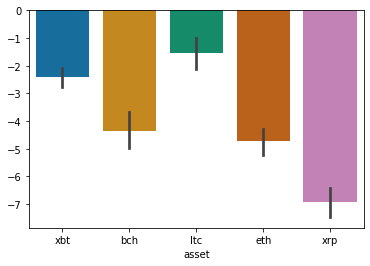

In [6]:
# plot
sns.barplot(data=carry * ann * 100)

In [ ]:
# cryptocurrency returns
